## Chapitre 1 : Mesure du pH de solutions diluées d’acide chlorhydrique

Le programme ci-dessous permet d’évaluer l’incertitude sur la concentration des solutions préparées par dilutions en tenant compte des différentes sources d’incertitudes liées au matériel utilisé.
Pour cela :
1. Remplir la ligne 17 en indiquant la concentration de la solution mère utilisée ainsi que son incertitude associée.
2. Remplir la ligne 27 en indiquant le numéro de la solution fille.
3. Remplir les lignes 30, 31, 32 en indiquant le nombre de fois que chaque pipette a été utilisée pour la dilution. Inscrire 0 si vous n’avez pas utilisé la pipette du volume indiqué.
4. Indiquer le volume de la fiole utilisée. (Ligne 34 et 35).
5. Exécuter le programmme et relever l'incertitude type affichée.

In [45]:
#**********************************************************************************************************#
# Méthode de Monte-Carlo pour le calcul de la valeur moyenne et de l'incertitude-type de la concentration  #
# molaire Cf de la solution fille Si (i compris entre 1 et 5)                                              #
# Programme publié par le GRIESP en 2019                                                                   #
#Modifications mineures apportées par Marie-Anne DEJOAN et Marieke Bonnaffé=Moity                          #
#**********************************************************************************************************#

import numpy as np
from matplotlib import pyplot as plt

# Renvoie une valeur aléatoire de la variable L[0] d'incertitude-type L[1]
def Alea(L):
    tirage=np.random.normal()   # Tirage entre -infini et +infini (loi normale)
    return L[0]+L[1]*tirage

# Solution mère et son incertitude
Cm=[0.01,5.1e-3] # [valeur,incertitude-type]

# Incertitudes sur la verrerie utilisée
u_fiole50=0.06e-3      # Fiole jaugée à 50 mL
u_fiole100=0.1e-3      # Fiole jaugée à 100 mL
u_pipette5=0.03e-3   # Pipette jaugée à 5 mL
u_pipette10=0.04e-3  # Pipette jaugée à 10 mL
u_pipette20=0.06e-3  # Pipette jaugée à 20 mL

#----------------------Partie du script à compléter par les élèves-------------------------
numero=2   # Solution fille i (i compris entre 1 et 5)

# Prélevement du volume Vm de solution mère :
coef_5=0   # nombre de prélevements réalisés avec la pipette jaugée à 5mL (0, 1 ou 2)
coef_10=1  # avec la pipette jaugée à 10mL (0, 1 ou 2)
coef_20=0  # avec la pipette jaugée à 20mL (0, 1 ou 2)

#Volume de fiole utilisée (inscrire 1 pour la fiole utilisée, 0 pour l'autre)
Nfiole50=0
Nfiole100=1

# Incertitude composée sur le volume prélevé de solution mère à l'aide des pipettes jaugées
u_pipettes=np.lib.scimath.sqrt(coef_5*(u_pipette5**2)+coef_10*(u_pipette10**2)+coef_20*(u_pipette20**2))

# Incertitude composée sur le volume de solution préparée à l'aide des fioles
u_fiole=np.lib.scimath.sqrt(Nfiole50*(u_fiole50**2)+Nfiole100*(u_fiole100**2))

Vm=[coef_5*5e-3+coef_10*10e-3+coef_20*20e-3,u_pipettes]   # Volume prélevé de la solution mère et incertitude composée
Vf=[Nfiole50*50e-3+Nfiole100*100e-3,u_fiole]    # Volume de la solution fille
#------------------------------------------------------------------------------------------

# Calcul de Cf
Cf=Cm[0]*Vm[0]/Vf[0] # Cf: concentration de la solution fille (Si)

# Méthode de Monte Carlo pour trouver l'incertitude sur Cf sans formule de propagation des incertitudes
LCf=[] # Initialisation de la liste LCf qui contiendra les valeurs successives de Cf calculées par itération
iteration=100000

for i in range(iteration):
    AleaCf=Alea(Cm)*Alea(Vm)/Alea(Vf)
    LCf.append(AleaCf) # Ajout de la dernière valeur calculée à la liste LCf

MoyCf=np.mean(LCf)        # Calcul de la valeur moyenne de Cf (à partir des éléments qui composent la liste LCf)
uCf=np.std(LCf, ddof = 1) # Ecart-type expérimental = incertitude-type de la grandeur Cf

# Affichage
print('Solution fille n°',numero)
print('Calcul de Cf :',Cf,'mol/L')
print('Moyenne des Cf :',MoyCf,'mol/L')
print('u(Cf) :',uCf,'mol/L')


Solution fille n° 2
Calcul de Cf : 0.001 mol/L
Moyenne des Cf : 0.000998728397071074 mol/L
u(Cf) : 0.0005112701614025927 mol/L


### Tracé du graphique


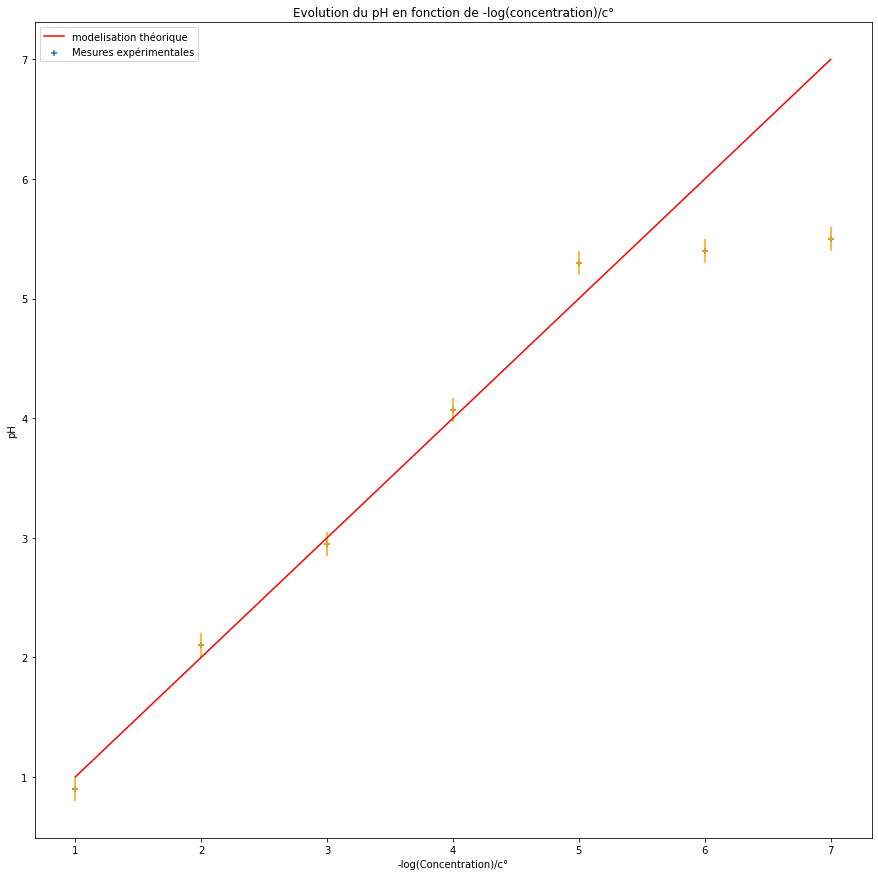

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#Valeurs expérimentales
Concentration = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7] #A compléter par les élèves
x=-np.log10(np.array(Concentration))
pHexp=[0.9,2.1,2.95,4.07,5.3,5.4,5.5] #A completer par les élèves

#Tracé du modèle à partir de la relation du pH
cth=np.arange(1e-7,0.1,0.0001) #Genere une liste de valeurs de concentrations
pHth=-np.log10(cth) #Calcul le pH théorie relatif aux concentrations

#Tracé de l'évolution du pH en fonction de la concentration
plt.figure(figsize=(15,15))
plt.plot(pHth,pHth,color = 'red', label = 'modelisation théorique') #Tracé du modèle théorique
plt.scatter(x,y=pHexp,marker= '+', label='Mesures expérimentales') #Tracé des points correspondants aux mesures expérimentales
plt.xlabel('-log(Concentration)/c°')
plt.ylabel('pH')
plt.title('Evolution du pH en fonction de -log(concentration)/c°')
plt.legend()


#A Completer pour la partie 3 du TP
#Tracé des barres d'incertitudes (les incertitudes sur la concentration sont évaluées à l'aide d'une autre programme)
incertitudeC=[5e-3,5.1e-4,5.2e-5,5.3e-6,5.4e-7,5.4e-8,5.4e-9] #Inscrire les valeurs des incertitudes de chaque concentration en respectant l'ordre de la liste concentration
incertitudex=np.array(incertitudeC)/(np.log(10)*np.array(Concentration))
incertitudepH=0.1 #Inscrire la valeur de l'incertitude du pHmetre
plt.errorbar(x,pHexp,xerr=incertitudex,yerr=incertitudepH,fmt='none',ecolor='orange')
plt.show()